
    Choose an option:
    1. Check Code
    2. View Trend
     2
Please input the code of the stock requested:  AAPL
Please enter start date (e.g., 2019-1-1):  2023-1-1
Please enter end date (e.g., 2019-12-31):  2023-12-31


[*********************100%***********************]  1 of 1 completed


Start date: 2023-01-01 00:00:00
End date: 2023-12-31 00:00:00
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045036  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271118  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795593  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  



Please select type of graph:
(2) High
(3) Low
(4) Open
(5) Close
(6) Adj Close
(7) Moving Average
(8) Volume

You may select multiple choices, separate each choice by a comma.

Sample input for High + Volume: 2,8
 2


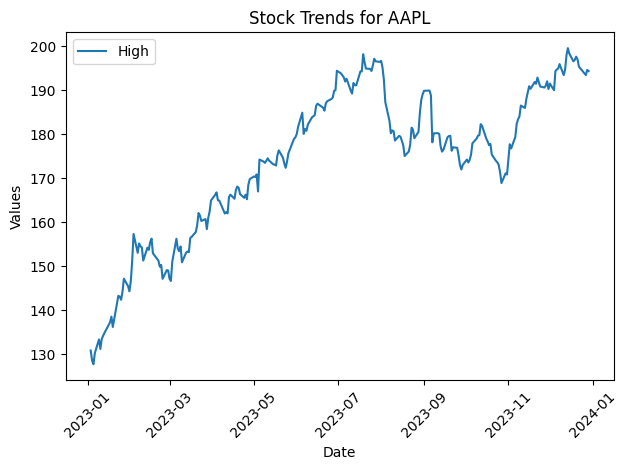

In [4]:
import pandas as pd
import yfinance as yf
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Function to fetch NASDAQ symbols
def fetch_nasdaq_symbols():
    url = "https://www.nasdaq.com/screening/companies-by-industry"
    response = requests.get(url)
    data = response.text.splitlines()

    tickers_list = []
    for line in data:
        if line.startswith("Symbol"):
            continue
        tickers_list.append(line.split(',')[0])  # assuming the symbol is in the first column

    return tickers_list

# Function to display the menu and handle user input
def user_input():
    menu = '''
    Choose an option:
    1. Check Code
    2. View Trend
    '''
    
    choice = input(menu).strip()
    if choice == '1':
        check_code()
    elif choice == '2':
        view_trend()
    else:
        print("Invalid input. Please try again.")

# Function to check code
def check_code():
    input_keyword = input("Please input keyword for the stock searching for: ").strip()
    
    # Fetch NASDAQ symbols and create a DataFrame
    tickers_list = fetch_nasdaq_symbols()
    df = pd.DataFrame(tickers_list, columns=["Symbol"])

    # Display last 3 rows of the dataframe (TODO 2)
    print("\nLast 3 rows of the dataset:")
    print(df.tail(3))

    # Save to tickers.csv (TODO 3)
    df.to_csv("tickers.csv", index=False)
    
    # Keep only 'Security Name' and 'Symbol' columns
    df = df[['Symbol']]

    # Save to simple_tickers.csv (TODO 5)
    df.to_csv("simple_tickers.csv", index=False)
    
    # Filter based on keyword (TODO 6)
    df = df[df['Symbol'].str.contains(input_keyword, case=False, na=False)]

    # Set the index of the dataframe to be 'Symbol' (TODO 7)
    df.set_index('Symbol', inplace=True)
    
    # Save the result to simple_tickers V2.csv (TODO 8)
    df.to_csv("simple_tickers_v2.csv")
    print("\nFiltered and updated tickers saved to simple_tickers_v2.csv")

# Function to view stock trends
def view_trend():
    code = input("Please input the code of the stock requested: ").strip()

    while True:
        try:
            input_start = input("Please enter start date (e.g., 2019-1-1): ").strip()
            input_end = input("Please enter end date (e.g., 2019-12-31): ").strip()
            start = datetime.strptime(input_start, "%Y-%m-%d")
            end = datetime.strptime(input_end, "%Y-%m-%d")
            break
        except ValueError:
            print("The format of the date you entered is incorrect. Please try again.")

    print(f"Start date: {start}")
    print(f"End date: {end}")

    # Fetch stock data
    df = yf.download(code, start=start, end=end)

    # Display the fetched data
    print(df.head())

    # Ask for graph choice
    graph_choice = input('''
Please select type of graph:
(2) High
(3) Low
(4) Open
(5) Close
(6) Adj Close
(7) Moving Average
(8) Volume

You may select multiple choices, separate each choice by a comma.

Sample input for High + Volume: 2,8
''').split(',')

    # Draw graphs based on user input
    for choice in graph_choice:
        if choice == '2':
            plt.plot(df['High'], label='High')
        elif choice == '3':
            plt.plot(df['Low'], label='Low')
        elif choice == '4':
            plt.plot(df['Open'], label='Open')
        elif choice == '5':
            plt.plot(df['Close'], label='Close')
        elif choice == '6':
            plt.plot(df['Adj Close'], label='Adj Close')
        elif choice == '7':
            ma_days = int(input("Enter the moving average days: "))
            df['MA'] = df['Close'].rolling(ma_days).mean()
            plt.plot(df['MA'], label=f'Moving Average ({ma_days} days)')
        elif choice == '8':
            # Plot volume correctly with dates as x-axis
            plt.bar(df.index, df['Volume'], label='Volume', width=0.5)

    # Finalize and display the plot
    plt.title(f"Stock Trends for {code}")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Ensure layout doesn't overlap
    plt.show()

# Main function
def main():
    user_input()

if __name__ == "__main__":
    main()
